In [95]:
import cv2 as cv
import tensorflow as tf
import numpy as np
from keras.models import model_from_json
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix, classification_report,ConfusionMatrixDisplay
import matplotlib.pyplot as plt

In [67]:
emotion_dict = {0: "Angry", 1: "Disgusted", 2: "Fearful", 3: "Happy", 4: "Neutral", 5: "Sad", 6: "Surprised"}

# load json and create model
json_file = open('models/emotion_model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
emotion_model = model_from_json(loaded_model_json)

# load weights into new model
emotion_model.load_weights("models/emotion_model.h5")

In [74]:
face_cascade = cv.CascadeClassifier('cascade/haarcascade_frontalface_alt2.xml')

In [106]:
def emotions(img):
    gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, 1.1, 4)
    print(faces)
    for(x, y, w, h) in faces: 
        cv.rectangle(img, (x, y), (x+w, y+h),  (0, 0, 255), 2) 
        gray_face = gray[y:y + h, x:x + w] 
        resized=cv.resize(gray_face, (48,48))
        image_tensor = tf.convert_to_tensor(resized, dtype=tf.float32)
        # Add dimension to match with input mode 
        image_tensor = tf.expand_dims(image_tensor, 2)
        image_tensor = tf.expand_dims(image_tensor, 0)
        image_tensor=image_tensor/255
        print(emotion_dict[emotion_model.predict(image_tensor).argmax()], end='\n')
    

[[756 271 252 252]
 [414 200 271 271]]
1/1 [==============================] - 0s 21ms/step
Happy
1/1 [==============================] - 0s 24ms/step
Happy


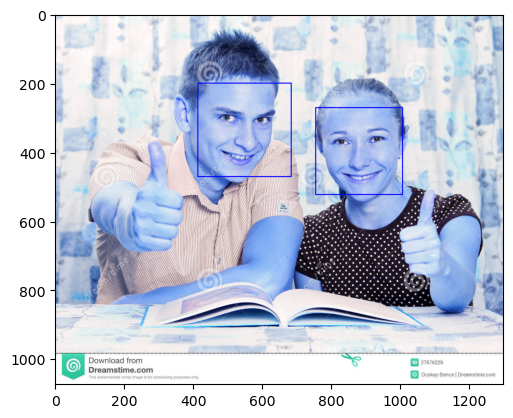

In [110]:
img = cv.imread('5.jpeg')
plt.imshow(img)
emotions(img)
plt.imshow(img)